# 1.7: Creating Network Visualizations Task
* Libraries imported
* Graph visualization - Networkx
* Graph visualization - Pyvis
* Community detection - Leiden algorithm
* The most important countries in the 20th Century

Libraries imported

In [35]:
# Librarires are imported
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [10]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_relationship_Task1.6.csv', index_col = 0)

In [13]:
relationship_df

,source,target
0,France,Russia
1,France,Russia
2,Germany,Russia
3,Germany,Russia
4,France,Russia
...,...,...
269,Italy,Japan
270,Italy,Japan
271,Italy,Japan
272,Italy,Japan


In [19]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            create_using = nx.Graph())

# Graph visualization - Networkx

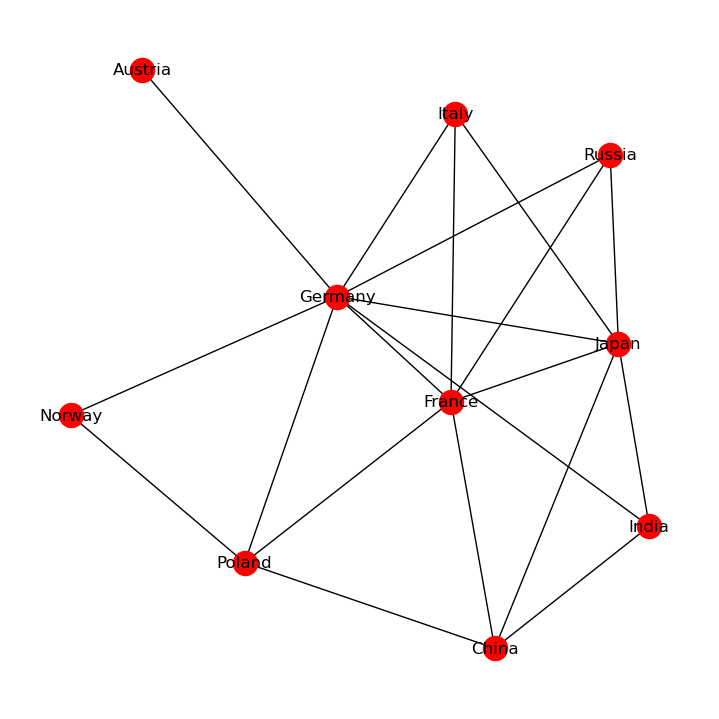

In [22]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [39]:
h.savefig('networkx_plt_20th_century.png')

# Graph visualization - Pyvis

In [44]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

20th_century.html


# Community detection - Leiden algorithm

In [54]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [57]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [60]:
new_com = coms.to_node_community_map()

In [63]:
new_com

defaultdict(list,
            {'Germany': [0],
             'Austria': [0],
             'Poland': [0],
             'Norway': [0],
             'France': [1],
             'Russia': [1],
             'Italy': [1],
             'Japan': [1],
             'China': [2],
             'India': [2]})

In [66]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [69]:
dict_com

{'Germany': 0,
 'Austria': 0,
 'Poland': 0,
 'Norway': 0,
 'France': 1,
 'Russia': 1,
 'Italy': 1,
 'Japan': 1,
 'China': 2,
 'India': 2}

In [72]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

20th_century_communities_leiden.html


The graph reflects geopolitical dynamics of the 20th century, particularly around World War I, World War II, and the Cold War, using a community detection algorithm. Each node represents a country, and connections (edges) indicate significant historical ties or shared events. Node size suggests importance or centrality within the network.

Germany as the Central Node
* Germany is the largest and most central node, colored yellow, indicating it had the most influence and connections during the 20th century.

* This reflects historical reality: Germany was a principal actor in both World Wars and in the shaping of post-war Europe.

* Its numerous connections — to Italy, Austria, Poland, Russia, France, and Norway — mirror alliances and conflicts:

* * Axis powers with Italy and Austria.
* * Wars with France, Poland, and Russia.

# The most important countries in the 20th Century

In [77]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.6666666666666666,
 'Russia': 0.3333333333333333,
 'Germany': 0.8888888888888888,
 'Italy': 0.3333333333333333,
 'Austria': 0.1111111111111111,
 'Poland': 0.4444444444444444,
 'Norway': 0.2222222222222222,
 'Japan': 0.6666666666666666,
 'China': 0.4444444444444444,
 'India': 0.3333333333333333}

In [80]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [83]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

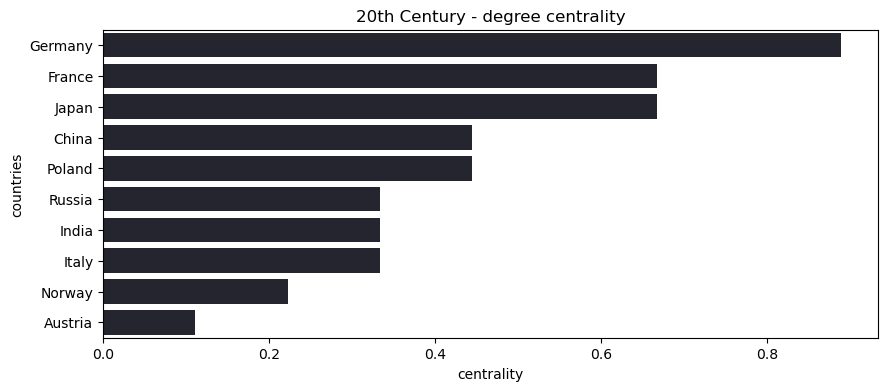

In [95]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century - degree centrality")

In [89]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [92]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

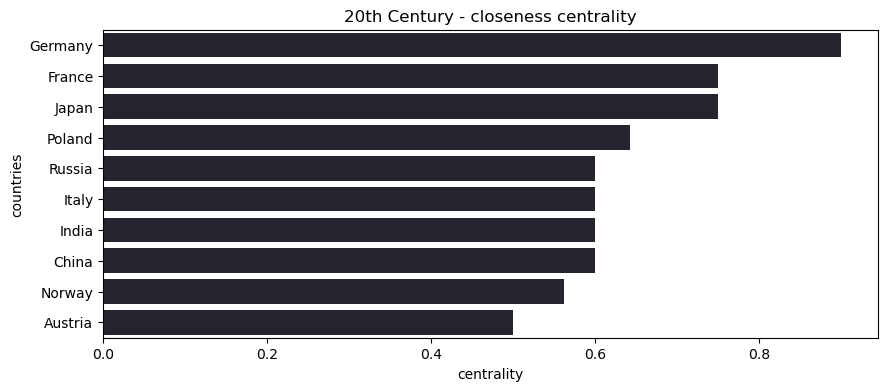

In [103]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century - closeness centrality")

In [106]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [109]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

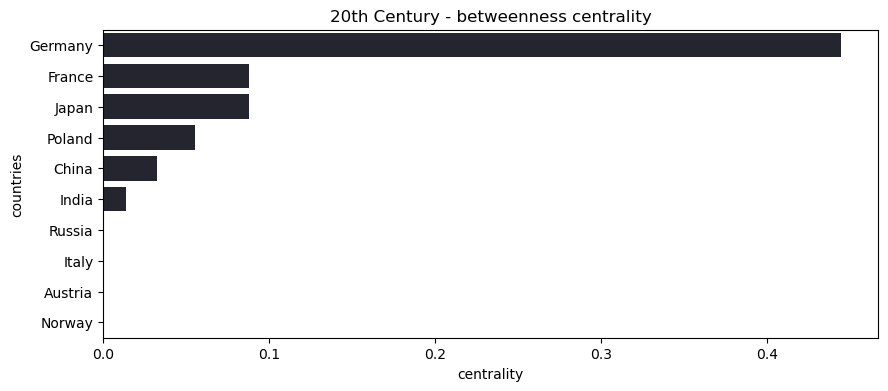

In [112]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century - betweenness centrality")

In [117]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# The combination of degree, closeness, betweenness centrality analysis and community detection confirms Germany’s historical centrality. This network model supports what historians widely agree upon: that the 20th century’s most transformative global events; wars, political realignments, ideological conflicts, were either triggered by, centered around, or heavily influenced by Germany.

# This graph is a powerful intersection of data science and historical analysis, offering a structural validation of Germany’s dominant role in shaping the modern world order.